In [45]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
box_office_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
alt_title_names = pd.read_csv('title.akas.csv')
title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')


# Question 1: Average voter rating and popularity vs gross
## Merge important dataframes
Merge movie_budgets with tmdb_movies

In [47]:
# rename column key in movie_budgets to match key in tmdb_movies
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)

In [48]:
# create new dataframe and assign it to the merging of tmdb_movies and movie_budgets
movie_financials_and_popularity = pd.merge(movie_budgets, tmdb_movies, on='title') # use title as merging key

In [49]:
# drop duplicated columns and irrelevant columns
movie_financials_and_popularity.drop(columns=['genre_ids', 'original_title', 'id_x',
                                              'id_y', 'original_language', 'release_date_y', 'Unnamed: 0'], inplace=True)
movie_financials_and_popularity.rename(columns={'release_date_x': 'release_date'}, inplace=True)
movie_financials_and_popularity.head() # print dataframe to check that merging worked correctly

,release_date,title,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",80.773,8.3,13948
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",34.953,6.2,7510


In [50]:
movie_financials_and_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 8 columns):
release_date         2385 non-null object
title                2385 non-null object
production_budget    2385 non-null object
domestic_gross       2385 non-null object
worldwide_gross      2385 non-null object
popularity           2385 non-null float64
vote_average         2385 non-null float64
vote_count           2385 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 167.7+ KB


## Clean data to get money values to integers

budget_series = movie_financials_and_popularity['production_budget']
domestic_series = movie_financials_and_popularity['domestic_gross']
worldwide_series = movie_financials_and_popularity['worldwide_gross']


budget_string = budget_series.to_string(index=False,header=False)
domestic_string = domestic_series.to_string(index=False, header=False)
worldwide_string = worldwide_series.to_string(index=False, header=False)

budget_string_to_convert = budget_string.replace('$', '')
domestic_string_to_convert = domestic_string.replace('$', '')
worldwide_string_to_convert = worldwide_string.replace('$', '')

budget_string_to_convert = budget_string_to_convert.replace(',', '')
domestic_string_to_convert = domestic_string_to_convert.replace(',', '')
worldwide_string_to_convert = worldwide_string_to_convert.replace(',', '')

budget_list = budget_string_to_convert.split()
domestic_list = domestic_string_to_convert.split()
worldwide_list = worldwide_string_to_convert.split()
movie_financials_and_popularity.head()

cleaned_budget_series = pd.Series(budget_list)
cleaned_domestic_series = pd.Series(domestic_list)
cleaned_worldwide_series = pd.Series(worldwide_list)

budget_int = pd.to_numeric(cleaned_budget_series)
domestic_int = pd.to_numeric(cleaned_domestic_series)
worldwide_int = pd.to_numeric(cleaned_worldwide_series)

movie_financials_and_popularity['production_budget'] = budget_int
movie_financials_and_popularity['domestic_gross'] = domestic_int
movie_financials_and_popularity['worldwide_gross'] = worldwide_int

In [53]:
money_values_to_integer(movie_financials_and_popularity, 'production_budget')
money_values_to_integer(movie_financials_and_popularity, 'domestic_gross')
money_values_to_integer(movie_financials_and_popularity, 'worldwide_gross')

,release_date,title,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,34.953,6.2,7510
...,...,...,...,...,...,...,...,...
2380,"Sep 1, 2015",Exeter,25000,0,489792,5.934,4.7,121
2381,"Apr 21, 2015",Ten,25000,0,0,1.575,5.4,5
2382,"Dec 31, 2014",Dry Spell,22000,0,0,0.600,6.0,1
2383,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,2.078,3.9,19


In [54]:
movie_financials_and_popularity.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,26.526,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.579,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,34.953,6.2,7510


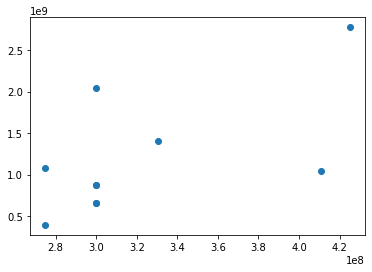

In [57]:
ax = plt.scatter(movie_financials_and_popularity['production_budget'][0:10], movie_financials_and_popularity['worldwide_gross'][0:10])